First of all we have to mount our google drive, because we have uploaded our EuroSAT dataset into google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/Thesis/dataSet/train.zip /home/
!mkdir /home/Dataset

In [ ]:
!unzip /home/train.zip -d /home/Dataset

Archive:  /home/train.zip
   creating: /home/Dataset/train/0/
 extracting: /home/Dataset/train/0/0.jpg  
 extracting: /home/Dataset/train/0/1.jpg  
 extracting: /home/Dataset/train/0/10.jpg  
 extracting: /home/Dataset/train/0/11.jpg  
 extracting: /home/Dataset/train/0/12.jpg  
 extracting: /home/Dataset/train/0/13.jpg  
 extracting: /home/Dataset/train/0/14.jpg  
 extracting: /home/Dataset/train/0/15.jpg  
 extracting: /home/Dataset/train/0/16.jpg  
 extracting: /home/Dataset/train/0/17.jpg  
 extracting: /home/Dataset/train/0/18.jpg  
 extracting: /home/Dataset/train/0/19.jpg  
 extracting: /home/Dataset/train/0/2.jpg  
 extracting: /home/Dataset/train/0/20.jpg  
 extracting: /home/Dataset/train/0/21.jpg  
 extracting: /home/Dataset/train/0/22.jpg  
 extracting: /home/Dataset/train/0/23.jpg  
 extracting: /home/Dataset/train/0/24.jpg  
 extracting: /home/Dataset/train/0/25.jpg  
 extracting: /home/Dataset/train/0/26.jpg  
 extracting: /home/Dataset/train/0/27.jpg  
 extracting: /hom

In [ ]:
!cp /content/drive/MyDrive/Thesis/dataSet/validData.zip /home/

In [ ]:
!unzip /home/validData.zip -d /home/Dataset

Archive:  /home/validData.zip
   creating: /home/Dataset/validData/0/
  inflating: /home/Dataset/validData/0/0.jpg  
 extracting: /home/Dataset/validData/0/1.jpg  
 extracting: /home/Dataset/validData/0/10.jpg  
 extracting: /home/Dataset/validData/0/11.jpg  
 extracting: /home/Dataset/validData/0/14.jpg  
 extracting: /home/Dataset/validData/0/2.jpg  
  inflating: /home/Dataset/validData/0/3.jpg  
  inflating: /home/Dataset/validData/0/4.jpg  
 extracting: /home/Dataset/validData/0/5.jpg  
 extracting: /home/Dataset/validData/0/6.jpg  
 extracting: /home/Dataset/validData/0/7.jpg  
 extracting: /home/Dataset/validData/0/8.jpg  
 extracting: /home/Dataset/validData/0/9.jpg  
   creating: /home/Dataset/validData/1/
 extracting: /home/Dataset/validData/1/0.jpg  
  inflating: /home/Dataset/validData/1/1.jpg  
 extracting: /home/Dataset/validData/1/10.jpg  
 extracting: /home/Dataset/validData/1/11.jpg  
 extracting: /home/Dataset/validData/1/12.jpg  
  inflating: /home/Dataset/validData/1

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, datasets, models

#import keras
#from keras import layers
#from keras.layers import Dropout
#from keras import models
#from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os, shutil,glob
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
!pip install git+https://github.com/mjkvaak/ImageDataAugmentor

  Cloning https://github.com/mjkvaak/ImageDataAugmentor to /tmp/pip-req-build-754fzk2y
  Running command git clone -q https://github.com/mjkvaak/ImageDataAugmentor /tmp/pip-req-build-754fzk2y
     |████████████████████████████████| 51.0MB 59kB/s 
  Created wheel for ImageDataAugmentor: filename=ImageDataAugmentor-0.0.0-cp37-none-any.whl size=29545 sha256=dc563d9a3a5415b25e991b61b157d03cfb2b9be76bb56f9d2bb68b72776737c4
  Stored in directory: /tmp/pip-ephem-wheel-cache-1q9pl1oe/wheels/d9/10/55/6fca35a4072f87d694876d56ece64db3846cf45e1da1c381fe
Successfully built ImageDataAugmentor
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [ ]:
from ImageDataAugmentor.image_data_augmentor import *
import albumentations


AUGMENTATIONS = albumentations.Compose([
    albumentations.Transpose(p=0.5),
    albumentations.Flip(p=0.5),
    albumentations.OneOf([
        albumentations.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3),
        albumentations.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1)
    ],p=1),
    #albumentations.GaussianBlur(p=0.05),
    albumentations.HueSaturationValue(p=0.5),
    albumentations.RGBShift(p=0.5),
])

In [ ]:
train_dir='/home/Dataset/train'
validation_dir='/home/Dataset/validData'

In [ ]:
import torchvision.datasets as datasets
valid_ds = datasets.ImageFolder(validation_dir)
valid_ds.classes

['0', '1', '2', '3', '4', '5']

In [ ]:
import torchvision.transforms as transforms
import torch
sz=64
batch_size=16
tfms = transforms.Compose([
    transforms.Resize((sz, sz)),  # PIL Image
    transforms.ToTensor()       # Tensor
    
])
valid_ds = datasets.ImageFolder(validation_dir, transform=tfms)
valid_dl = torch.utils.data.DataLoader(valid_ds, batch_size=batch_size,shuffle=True, num_workers=8)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


tensor([0, 5, 4, 2, 3, 0, 5, 3, 4, 5, 4, 2, 2, 1, 3, 5])
tensor([2, 3, 0, 3, 3, 0, 1, 1, 2, 2, 4, 0, 5, 5, 1, 4])


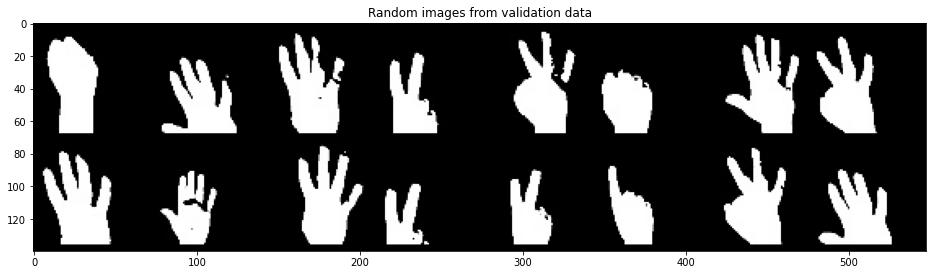

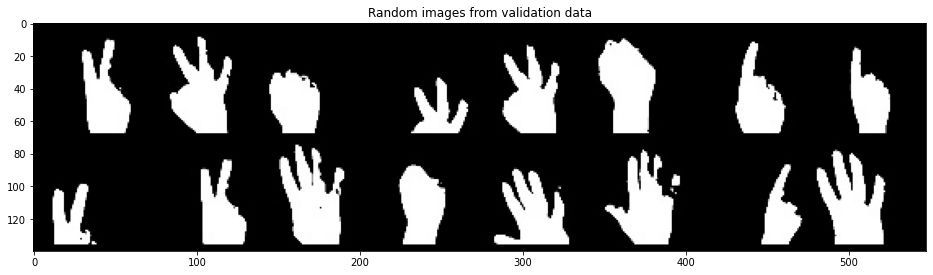

In [ ]:
import torchvision
for i in range(2):
    inputs, targets = next(iter(valid_dl))
    out = torchvision.utils.make_grid(inputs, padding=4,nrow=8)
    plt.figure(figsize=(16, 12))
    plt.imshow(out.numpy().transpose((1,2,0)))
    plt.title('Random images from validation data')
    print(targets)

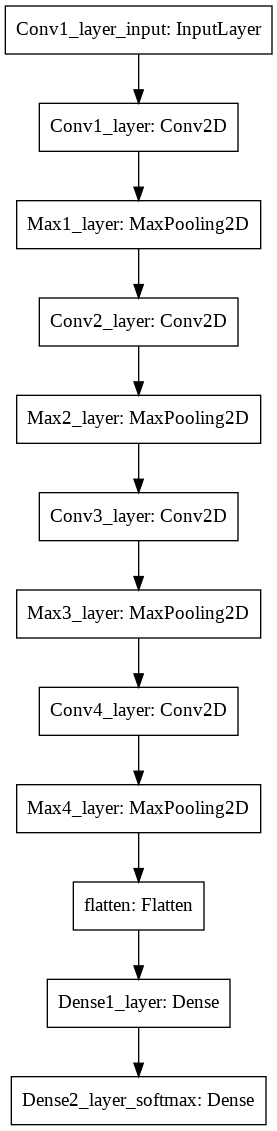

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same',strides=1,
                        input_shape=(64, 64, 1),name = "Conv1_layer"))
model.add(layers.MaxPooling2D((2, 2),name = "Max1_layer"))
model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same',strides=1,name = "Conv2_layer"))
model.add(layers.MaxPooling2D((2, 2),name = "Max2_layer"))
model.add(layers.Conv2D(64, (5, 5), activation='relu',padding='same',strides=1,name = "Conv3_layer"))
model.add(layers.MaxPooling2D((2, 2),name = "Max3_layer"))
model.add(layers.Conv2D(128, (5, 5), activation='relu',padding='same',strides=1,name = "Conv4_layer"))
model.add(layers.MaxPooling2D((2, 2),name = "Max4_layer"))
model.add(layers.Flatten())
model.add(layers.Dense(2048, activation='relu',name = "Dense1_layer"))
model.add(layers.Dense(6, activation='softmax',name = "Dense2_layer_softmax"))
tf.keras.utils.plot_model(model, to_file="model.png")

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# Normalize
#train_datagen = ImageDataGenerator(rescale=1./255)
#validation_datagen = ImageDataGenerator(rescale=1./255)

train_datagen = ImageDataAugmentor(
        rescale=1./255,
        #augment = AUGMENTATIONS,
        preprocess_input=None)
        
validation_datagen = ImageDataAugmentor(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 64*64
        target_size=(64, 64),
        batch_size=5,
        color_mode='grayscale',
        class_mode='categorical',shuffle=True)#because we have 10 classes

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,target_size=(64, 64),batch_size=6,color_mode='grayscale',class_mode='categorical',shuffle=True)

Found 357 images belonging to 6 classes.
Found 78 images belonging to 6 classes.


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=71,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=13
      )

Epoch 1/50
71/71 [==============================] - 3s 10ms/step - loss: 1.7575 - acc: 0.2817 - val_loss: 1.8350 - val_acc: 0.2308
Epoch 2/50
71/71 [==============================] - 1s 7ms/step - loss: 1.0718 - acc: 0.5625 - val_loss: 2.2301 - val_acc: 0.3333
Epoch 3/50
71/71 [==============================] - 0s 6ms/step - loss: 0.5600 - acc: 0.7812 - val_loss: 0.7668 - val_acc: 0.7436
Epoch 4/50
71/71 [==============================] - 0s 6ms/step - loss: 0.3471 - acc: 0.8608 - val_loss: 0.4741 - val_acc: 0.8462
Epoch 5/50
71/71 [==============================] - 0s 6ms/step - loss: 0.1715 - acc: 0.9261 - val_loss: 1.8407 - val_acc: 0.5641
Epoch 6/50
71/71 [==============================] - 0s 6ms/step - loss: 0.1272 - acc: 0.9602 - val_loss: 0.3875 - val_acc: 0.9103
Epoch 7/50
71/71 [==============================] - 0s 6ms/step - loss: 0.1060 - acc: 0.9688 - val_loss: 0.3499 - val_acc: 0.8846
Epoch 8/50
71/71 [==============================] - 0s 6ms/step - loss: 0.0858 - acc: 0.9

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_history(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()
  return 

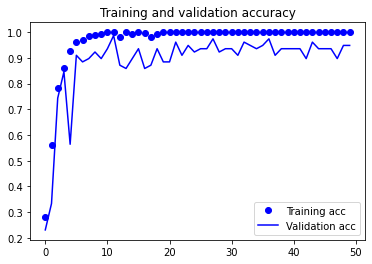

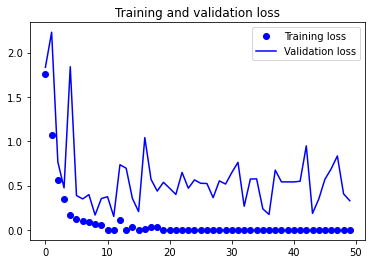

In [ ]:
plot_history(history)

In [ ]:
model.save('/content/drive/MyDrive/Thesis/Models/handGesture50Epoch.h5')

In [ ]:
# Saving the model
model_json = model.to_json()
with open("/content/drive/MyDrive/Thesis/Models/handGesture50Epoch.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights('/content/drive/MyDrive/Thesis/Models/handGesture50Epoch.h5')